# COVID-19 When we can end quarantine
* Data Source:
    **2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE**
    
https://github.com/CSSEGISandData/COVID-19

### Feedback from Udacity on the code April 8, 2020:
This is the area where you would need to focus. you have made an excellent analysis on COVID19 data and provided inference. But there is no function or class methods used in the codes. This is very important to make your code modular by bringing in repeated statements . This helps in readability , reusability and also will make the code easy for debugging.

Please do remember when you are changing this code to modular structure , do not forget to add Doc Strings which provides information on the function or class methods

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Formating pandas
pd.set_option('display.max_columns', 300) # display 300 columns without shrinking
pd.set_option('display.max_rows', 100) # Show more rows
pd.set_option('display.max_colwidth', 15) # Show non trunced fields, -1 is for pandas 0.24
pd.options.display.float_format = '{:,.0f}'.format #display large numbers not in scientific form

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,5)
sns.set_style('whitegrid')

## Import data

In [3]:
os.listdir('./Data Source/COVID-19/csse_covid_19_data/csse_covid_19_time_series/')

['.gitignore',
 'README.md',
 'time_series_covid19_confirmed_global.csv',
 'time_series_covid19_confirmed_US.csv',
 'time_series_covid19_deaths_global.csv',
 'time_series_covid19_deaths_US.csv',
 'time_series_covid19_recovered_global.csv']

In [4]:
file_dir = r'./Data Source/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [5]:
df = pd.read_csv(file_dir)

In [6]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423
1,NaN,Albania,41,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383
2,NaN,Algeria,28,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468
3,NaN,Andorra,43,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545
4,NaN,Angola,-11,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17


## CRISP-DM
#### 1. Business understanding
The goal is to visualize different countries' time series data and to understand when will see a turning point in decreasing growth of confirmed cases. This could be breakdown into three subquestions:
1. Which top 5 countries are having the highest confirmed cases of COVID-19?
3. How long will it take to have closing to 0 daily growth in confirmed cases?
2. How long will it take to have increasing speed first decreased?

#### 2. Data understanding
Data is collected from multiple sources by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). It is well cleaned and structured in country vs. timestamp format.
* There are 258 country/province split in rows by the time of analysis Apr 4, 2020.
* There are 77 days measured in columns by the time of analysis Apr 4, 2020.
* There are 178 missing values in Province/State however no missing data in Country/Region. This means some country only have all numbers and do not have Province/State split numbers.
* There is no missing value in other columns.
* By the date April 3rd, 2020, there are 1,095,917 total confirmed cases worldwide.
* By the date April 3rd, 2020, the top 5 countries with highest confirmed cases are US, Italy, Spain, Germany, China.

In [29]:
df.shape

(258, 77)

In [8]:
def data_overview(df):
    """ This function will return an overview of data using df.describe(), df.isnull().
    Input: dataframe
    Output:Overview of each columns' missing data, count, unique, top, freq, mean, std, min, percentile (25, 50, 75), max and sum 
    """
    des1 = df.describe(include='all')
    des2 = df.isnull().sum().to_frame(name = 'missing').T
    des3 = df.sum().to_frame(name = 'sum').T
    overview = pd.concat([des2,des1, des3], sort = False)
    return overview

data_overview(df)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
missing,181,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
count,82,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263,263
unique,82,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Henan,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,21,22,2,2,4,5,8,11,21,23,31,38,46,64,76,91,105,117,131,141,153,163,170,172,230,254,262,271,279,286,288,290,292,299,300,303,306,309,315,320,327,336,343,353,362,372,387,402,418,432,451,479,488,552,594,637,690,749,817,922,"1,035","1,158","1,281","1,438","1,590","1,778","2,014","2,256","2,512","2,738","2,975","3,260","3,546","3,853","4,167","4,553","4,837","5,114","5,422"
std,NaN,NaN,25,71,27,28,34,48,67,90,220,222,306,362,446,693,838,"1,032","1,217","1,368","1,543","1,675","1,831","1,960","2,061","2,062","2,975","3,357","3,470","3,589","3,701","3,805","3,827","3,852","3,865","3,953","3,953","3,966","3,996","4,021","4,047","4,068","4,096","4,133","4,148","4,160","4,172","4,186","4,203","4,221","4,237","4,257","4,273","4,306","4,317","4,410","4,492","4,588","4,702","4,838","5,020","5,313","5,669","6,099","6,537","7,146","7,762","8,586","9,702","10,866","12,147","13,348","14,659","16,275","17,892","19,740","21,707","23,984","25,718","27,517","29,418"
min,NaN,NaN,-52,-135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25%,NaN,NaN,7,-21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,3,3,4,6,7,8,10,10,12,14,15,17,20,20,21,22,24,27
50%,NaN,NaN,24,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,3,3,5,7,9,11,21,27,33,40,49,60,66,75,81,95,99,110,126,139,143,168,176,184,195,214,226,237


In [13]:
df[['Country/Region', '4/3/20']].groupby('Country/Region').agg('sum').sort_values(by = '4/3/20', ascending = False).head(5).reset_index()

,Country/Region,4/3/20
0,US,275586
1,Italy,119827
2,Spain,119199
3,Germany,91159
4,China,82511


In [12]:
df[['Country/Region', '4/7/20']].groupby('Country/Region').agg('sum').sort_values(by = '4/7/20', ascending = False).head(5).reset_index()

,Country/Region,4/7/20
0,US,396223
1,Spain,141942
2,Italy,135586
3,France,110065
4,Germany,107663


#### 3. Data preparation
Preparation steps:

1. To better understand the country level numbers we have aggregated the numbers into country level and sum by total of different province/state numbers.
2. Instead of absolute date time, we have converted them into relative days: days since the first case confirmed.
3. Adjust China starting days: since China reported the first confirmed case with 548, we are missing the growth curve before that. We are then adjust the starting date by using the new report firstly confirmed case as Dec 1st 2019.
4. Besides the daily confirmed cases, we also calculated cases differences from previous day.


In [42]:
def data_cleaning_pipeline(df):
    """This function cleans the data frame according to the steps defined:
        - 1. Aggregate data into country level
        - 2. Cohort analysis for all countries
        - 3. Adjusting starting date for China
    Input: dataframe
    Output: cleaned dataframe in 1, 2, 3 as three returns
        """
    #Step 1
    df_agg_horizontal = df.groupby('Country/Region').agg('sum').sort_values(by = '4/7/20', ascending = False).drop(columns = ['Lat', 'Long']).reset_index()
    
    #Step 2
    df_agg_vertical = pd.melt(df_agg_horizontal, id_vars = ['Country/Region'])
    df_agg_vertical = df_agg_vertical[df_agg_vertical['value']>0]
    df_agg_vertical['days_since_first_case'] = df_agg_vertical[df_agg_vertical['value']>0].groupby('Country/Region').cumcount()+1
    df_agg_vertical['diff_to_previous'] = df_agg_vertical.groupby('Country/Region')['value'].diff(1)
    df_agg_pivot = pd.pivot_table(df_agg_vertical, index = 'Country/Region', columns = 'days_since_first_case', values = 'value', aggfunc ='sum')
    
    #Step 3
    df_china_adjust = df_agg_vertical.copy()
    df_china_adjust.loc[df_china_adjust['Country/Region']=='China', 'days_since_first_case']= df_china_adjust[df_china_adjust['Country/Region']=='China']['days_since_first_case'] + 52
    df_china_adjust_pivot = pd.pivot_table(df_china_adjust, index = 'Country/Region', columns = 'days_since_first_case', values = 'value', aggfunc ='sum')
    
    return df_agg_horizontal, df_agg_vertical, df_agg_pivot, df_china_adjust_pivot

In [43]:
df_agg_horizontal, df_agg_vertical, df_agg_pivot, df_china_adjust_pivot  = data_cleaning_pipeline(df)

#### 3.1.Aggregate data into country level

Text(0, 0.5, 'confirmed cases accumulated')

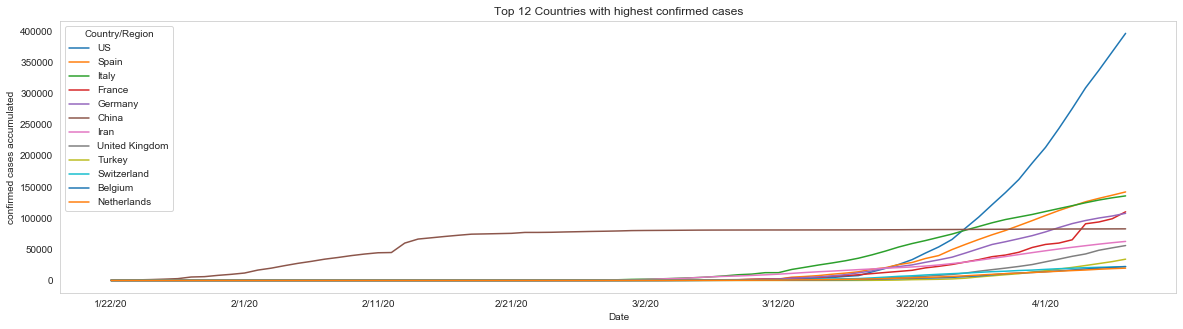

In [44]:
df_agg_horizontal.head(12).set_index('Country/Region').T.plot(
title = 'Top 12 Countries with highest confirmed cases', grid = False)
plt.xlabel('Date')
plt.ylabel('confirmed cases accumulated')

#### 3.2.Cohort analysis (mapping all countries with 0 confirmed cases)

Text(0, 0.5, 'Confirmed cases accumulated')

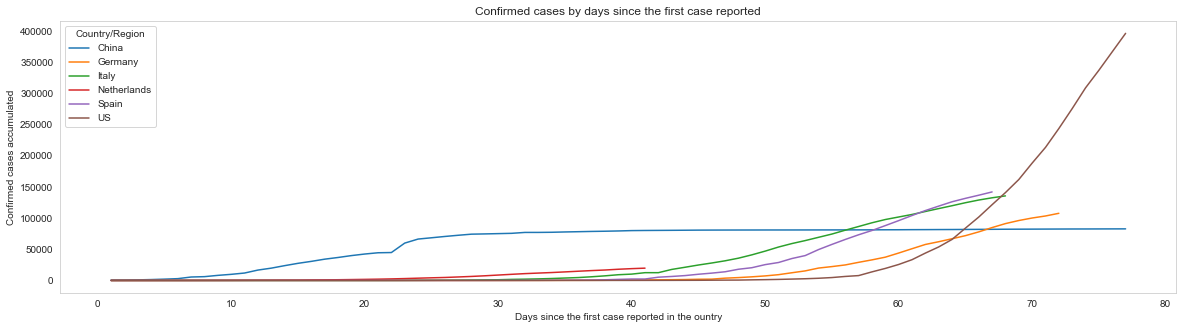

In [45]:
df_agg_pivot[df_agg_pivot.index.isin(['US', 'Germany', 'Italy', 'Spain', 'Netherlands', 'China'])].T.plot(
title = 'Confirmed cases by days since the first case reported', grid = False)
plt.xlabel('Days since the first case reported in the ountry')
plt.ylabel('Confirmed cases accumulated')

Text(0, 0.5, 'Confirmed cases accumulated - Log scale')

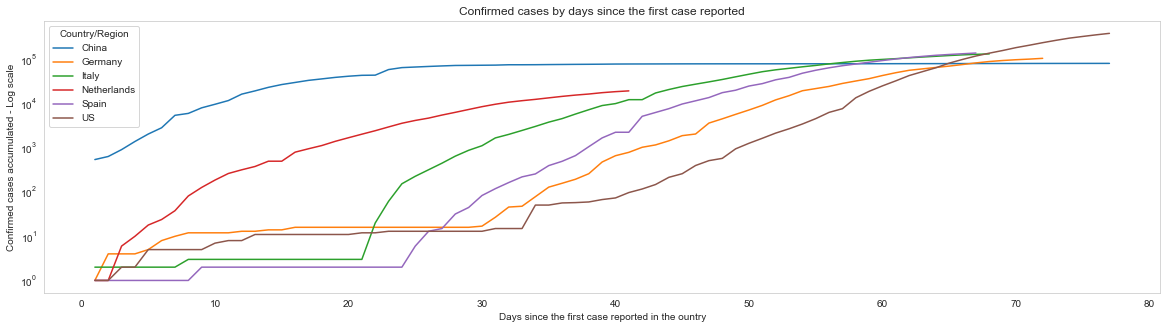

In [46]:
df_agg_pivot[df_agg_pivot.index.isin(['US', 'Germany', 'Italy', 'Spain', 'Netherlands', 'China'])].T.plot(
title = 'Confirmed cases by days since the first case reported', grid = False, logy = True)
plt.xlabel('Days since the first case reported in the ountry')
plt.ylabel('Confirmed cases accumulated - Log scale')

#### 3.3.Adjusted Cohort analysis (mapping all countries with 0 confirmed cases)
* Since China has starting point of 548 confirmed cases instead of 1. We will mannually bring back the reported first

Text(0, 0.5, 'Confirmed cases accumulated - Log scale')

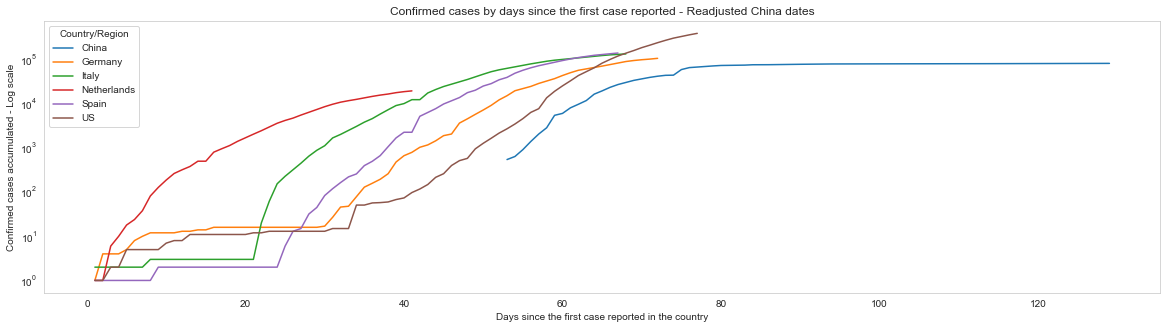

In [47]:
forecast = df_china_adjust_pivot[df_china_adjust_pivot.index.isin(['US', 'Germany', 'Italy', 'Spain', 'Netherlands', 'China'])].T.plot(
title = 'Confirmed cases by days since the first case reported - Readjusted China dates'    ,
grid = False, 
logy = True)
plt.xlabel('Days since the first case reported in the country')
plt.ylabel('Confirmed cases accumulated - Log scale')

#### Modelling

In [329]:
class CountryCurves():
    """This class describes the modelling of country confirmed cases curve. It has below attributes and methods:
        Attributes:
            |-current confirmed cases
            |-highest increase dates
        Methods:
            |-plot the accumulated curve with mapping to China
            |-plot daily increase scatter plot with mapping to China
            """
    data = df_china_adjust_pivot
    df_china_adjust = df_china_adjust
    speed = pd.pivot_table(df_china_adjust, index = 'Country/Region', columns = 'days_since_first_case', values = 'diff_to_previous', aggfunc ='sum')
    
    
    def __init__(self, country_name):
        self.country_name = country_name
        self._current_confirmed_cases = None
        self._highest_increase_dates = None
    
    @property
    def current_confirmed_cases(self):
        if self._current_confirmed_cases is None:
            self._current_confirmed_cases = CountryCurves.data.loc[self.country_name, :].dropna().sort_values(ascending = False)[:1]
            return self._current_confirmed_cases 
        else:
            return self._current_confirmed_cases 
    @property
    def highest_increase_dates(self):
        if self._highest_increase_dates is None:
            self._highest_increase_dates = CountryCurves.speed.loc[self.country_name, :].sort_values( ascending = False)[:5]
            return self._highest_increase_dates 
        else:
            return self._highest_increase_dates 
    
    def helper_list_convert(self):
        """To convert input strings into list"""
        list_country = []
        if isinstance(self.country_name, list):
            list_country = self.country_name
        else:
            list_country.append(self.country_name)
        return list_country
    
    def plot_accumulated_cases(self):
        """Plot the line graph of accumulated cases mapping to China."""
        list_country = self.helper_list_convert()
        forecast = CountryCurves.data[CountryCurves.data.index.isin(['China'] + list_country)].T.plot(
        title = 'Confirmed cases by days since the first case reported - Readjusted China dates'  ,
        logy = True)
        plt.plot([107, 107],[1, 200_000] ,'b--')
        plt.text(107, 10, """China's reported end quarantine 
        at day 107""", horizontalalignment='center',
             verticalalignment='center', fontsize = 15)
        plt.xlabel('Days since the first case reported in the country')
        plt.ylabel('Confirmed cases accumulated - Log scale')
        plt.savefig('./Plots/confirmed_cases.png')
        return plt.show()
    
    def plot_daily_increased_cases(self):
        """Plot the scatter plot of daily increased cases"""
        list_country = self.helper_list_convert()
        sns.scatterplot( 'days_since_first_case', 'diff_to_previous',hue = 'Country/Region' ,  
                data = CountryCurves.df_china_adjust[CountryCurves.df_china_adjust['Country/Region'].isin(['China'] + list_country)].sort_values(by = 'Country/Region')
            )
        plt.title('Confirmed cases daily increased amount comparing to previous day vs. days since the first case reported - Readjusted China dates')
        plt.yscale('log')
        plt.plot([75, 75],[1, 35_000] ,'b--')
        plt.text(75, 10, """China's turning point
        at day 75""", horizontalalignment='center',
             verticalalignment='center', fontsize = 15)
        plt.plot([107, 107],[1, 35_000] ,'b--')
        plt.text(107, 10, """China's reported end quarantine 
        at day 107""", horizontalalignment='center',
             verticalalignment='center', fontsize = 15)
        plt.xlabel('Days since the first case reported in the country')
        plt.ylabel('Confirmed cases difference to previous day - Log scale')
        plt.savefig('./Plots/confirmed_increases.png')
        return plt.show()

In [330]:
us = CountryCurves('US')

In [331]:
us.country_name

'US'

In [333]:
us.current_confirmed_cases

days_since_first_case
77   396,223
Name: US, dtype: float64

In [334]:
us.highest_increase_dates

days_since_first_case
74   33,264
73   31,970
72   30,244
76   29,595
77   29,556
Name: US, dtype: float64

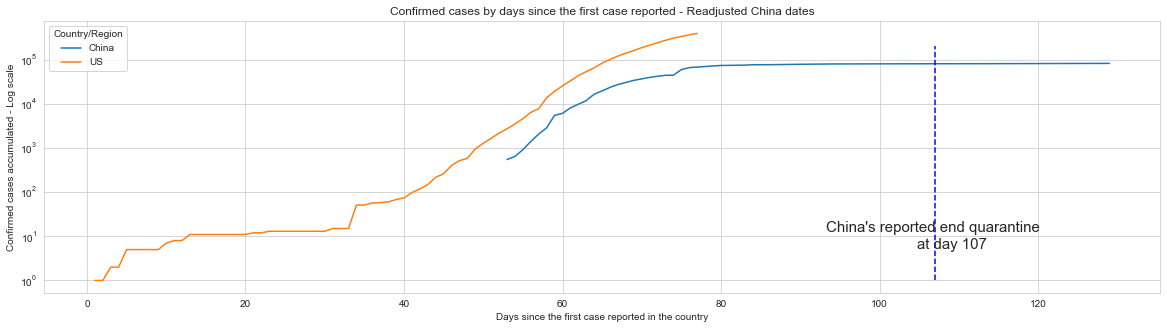

In [335]:
us.plot_accumulated_cases()

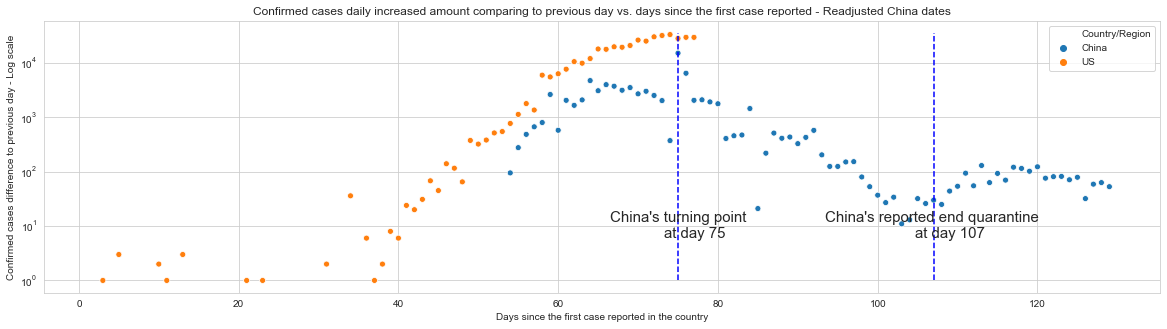

In [336]:
us.plot_daily_increased_cases()

# Appendix

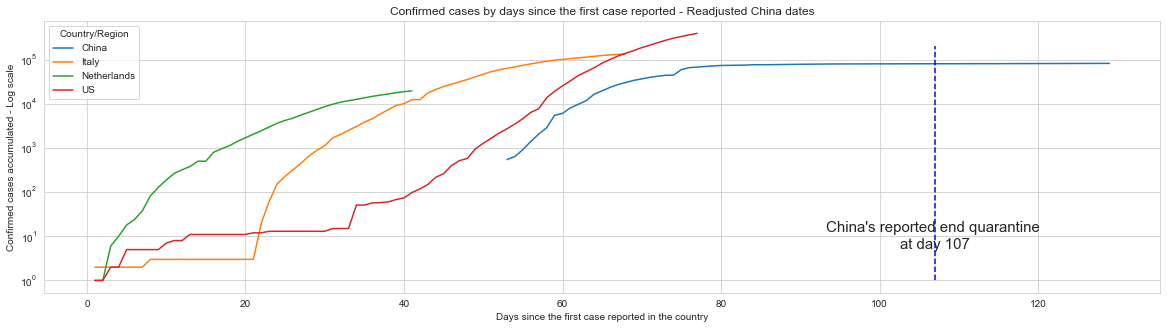

In [35]:
forecast = df_china_adjust_pivot[df_china_adjust_pivot.index.isin(['US', 'Italy', 'China', 'Netherlands'])].T.plot(
title = 'Confirmed cases by days since the first case reported - Readjusted China dates'  ,
logy = True)
plt.plot([107, 107],[1, 200_000] ,'b--')
plt.text(107, 10, """China's reported end quarantine 
at day 107""", horizontalalignment='center',
     verticalalignment='center', fontsize = 15)
plt.xlabel('Days since the first case reported in the country')
plt.ylabel('Confirmed cases accumulated - Log scale')
plt.savefig('./Plots/confirmed_cases.png')

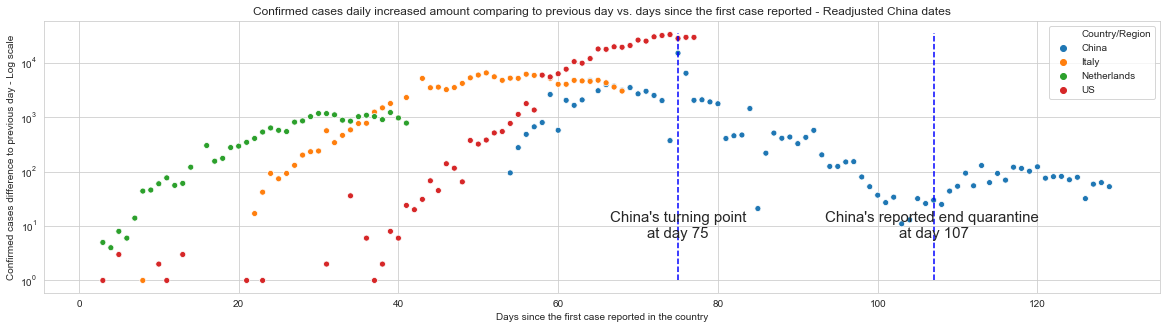

In [36]:
sns.scatterplot( 'days_since_first_case', 'diff_to_previous',hue = 'Country/Region' ,  
                data = df_china_adjust[df_china_adjust['Country/Region'].isin(['US', 'Italy', 'China', 'Netherlands'])].sort_values(by = 'Country/Region')
            )
plt.title('Confirmed cases daily increased amount comparing to previous day vs. days since the first case reported - Readjusted China dates')
plt.yscale('log')
plt.plot([75, 75],[1, 35_000] ,'b--')
plt.text(75, 10, """China's turning point
at day 75""", horizontalalignment='center',
     verticalalignment='center', fontsize = 15)
plt.plot([107, 107],[1, 35_000] ,'b--')
plt.text(107, 10, """China's reported end quarantine 
at day 107""", horizontalalignment='center',
     verticalalignment='center', fontsize = 15)
plt.xlabel('Days since the first case reported in the country')
plt.ylabel('Confirmed cases difference to previous day - Log scale')
plt.savefig('./Plots/confirmed_increases.png')